In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basic_functions import output_dir, G_N
from classes.ns import NeutronStar
from classes.particles import Particles
import multiprocess as mp
from scripts.conversion import find_all_hits, divide_into_singles

In [8]:
event = 'MCNFWIDDCRO'
part_trajs = np.load(output_dir + event + '/' + event + '.npy')
single_particles = divide_into_singles(part_trajs)

In [9]:
all_in_times = [single_particle[0][1] for single_particle in single_particles]
t_in = np.min(all_in_times)

In [10]:
M_NS, R_NS = 1, 10
NS = NeutronStar(M_NS, R_NS)

In [11]:
if __name__ == '__main__':
    mp.freeze_support()
    ncores = mp.cpu_count() - 1
    pool = mp.Pool(ncores)

    all_hits = find_all_hits(single_particles, NS, t_in, pool)

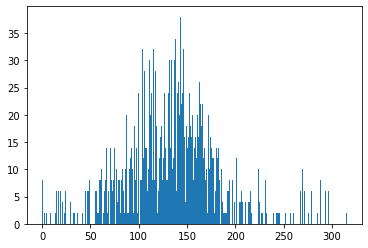

In [12]:
all_ts = (np.array(all_hits).T[0] - t_in)/(24*3600)
plt.hist(all_ts, bins=np.linspace(0, np.max(all_ts), int(np.max(all_ts))));

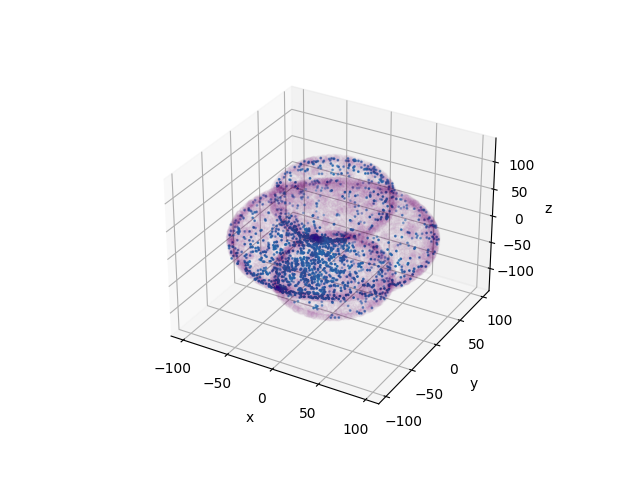

In [13]:
%matplotlib widget

X, Y, Z = np.array(all_hits).T[1:4]
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, s = 1);

Xsurf, Ysurf, Zsurf = NS.conversion_surface_est(Particles.axionmass).T
ax.scatter3D(Xsurf, Ysurf, Zsurf, c = 'purple', alpha = 0.01);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');

In [45]:
gag = 1 # In units of 10^{-12} GeV-1

from scripts.basic_functions import mag_vector, c, angle_between_vecs

axionmass_GHz = Particles.axionmass*15.192669

all_gammas = []
for hit in all_hits:
    time, position, velocity = hit[0], hit[1:4], hit[4:]
    BNS = NS.magnetic_field([position])[0]

    gamma = 1/np.sqrt(1 - np.power(mag_vector(velocity)/c, 2))
    all_gammas.append(gamma)

    k = axionmass_GHz*mag_vector(velocity)/c    # in GHz
    omega2 = np.power(axionmass_GHz, 2) + np.power(k, 2) # in GHz^2
    theta = angle_between_vecs(BNS, velocity)
    wp_bar2 = np.power(axionmass_GHz, 2)*omega2/(np.power(axionmass_GHz*np.cos(theta), 2) + omega2*np.power(np.sin(theta), 2))  # in GHz^2

    x_dir = np.cross(velocity, BNS)
    y_dir = np.cross(velocity, x_dir)
    y_hat = y_dir/mag_vector(y_dir)

    s_dir = wp_bar2*np.cos(theta)*np.sin(theta)/(omega2 - wp_bar2*np.power(np.cos(theta), 2))*y_hat + velocity/mag_vector(velocity)
    s_hat = s_dir/mag_vector(s_dir)

    epsilon = 1e-8
    new_position = position + s_hat*epsilon
    new_omega2 = omega2 - 0.5067728888630014*G_N*NS.mass*Particles.axionmass/np.power(mag_vector(position),2)*(mag_vector(new_position) - mag_vector(position)) # in GHz^2
    new_theta = angle_between_vecs(NS.magnetic_field([new_position])[0], velocity)
    new_wp_bar2 = np.power(axionmass_GHz, 2)*new_omega2/(np.power(axionmass_GHz*np.cos(new_theta), 2) + new_omega2*np.power(np.sin(new_theta), 2))  # in GHz^2

    wp_bar_prime = (new_wp_bar2 - wp_bar2)/(2*epsilon*np.sqrt(wp_bar2))

    prob = 0.2309957326532627e7*np.power(gag*mag_vector(BNS)*np.sin(theta), 2)*np.pi*np.power(axionmass_GHz, 5)/(2*k*np.abs(wp_bar_prime))/np.power(np.power(k, 2) + np.power(axionmass_GHz*np.sin(theta), 2), 2)
    print(prob)

8.791747474823287e-10
1.0704317352702895e-07
1.1535463448991605e-07
3.434972866870136e-07
3.2815213915087516e-07
4.089304623517862e-09
1.7666889105610215e-07
1.7932612751869874e-07
1.0516769798330464e-09
1.019448056054365e-09
1.6977937374847014e-08
6.95744883813544e-08
1.7414644818418887e-08
1.9648111437553134e-08
1.2624530915710578e-07
1.8280160111299177e-08
1.3050014701063634e-08
5.147782107089196e-05
6.72226381698881e-08
7.521655783559406e-08
6.86298449194046e-06
1.240117107731174e-08
7.476026571361976e-08
2.1627041453502898e-07
1.5650178194101767e-08
2.265428831323726e-08
4.3140546005559783e-07
6.842130444356421e-08
5.6523709577839015e-08
2.0540461226966668e-06
1.1515710512571404e-06
4.068868356003933e-08
1.5555069222606777e-09
1.471587985223757e-09
1.6067934415847995e-09
1.5781017133107415e-09
1.589294317079998e-09
1.7182522432513219e-09
4.220893574601897e-09
3.968199081685286e-09
9.431796518052209e-09
4.3799445818895917e-07
3.3621463983828925e-07
4.7134815662111987e-07
1.67421600

In [44]:
prob

6.9578169044364655e-09

In [38]:
wp_bar_prime

25802.07570459184

In [28]:
1.5192669/2.99792458

0.5067728888630014

In [24]:
s_hat

array([-0.27699618,  0.8141009 , -0.51040459])

In [17]:
BNS

array([2.45019440e-07, 7.11007077e-07, 9.79841918e-07])

In [18]:
np.max(all_gammas)

1.129374555240724